In [6]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np


[]
False


In [3]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [4]:
X_train = X_train / 255
X_test = X_test / 255

In [5]:
print(X_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [6]:
X_train.shape

(60000, 28, 28)

In [7]:
X_test.shape

(10000, 28, 28)

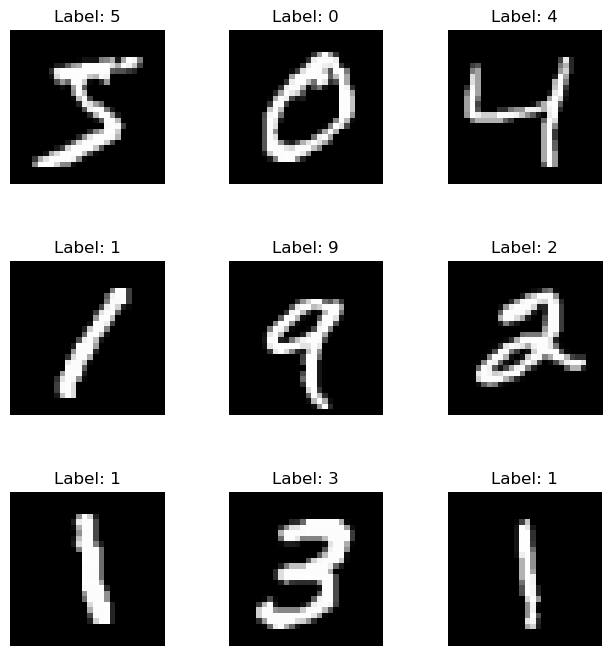

In [8]:
fig, axes = plt.subplots(3, 3, figsize=(8, 8))
fig.subplots_adjust(hspace=0.5)

# Display images in the subplot
for i, ax in enumerate(axes.flat):
    ax.imshow(X_train[i], cmap='gray')
    ax.set_title(f"Label: {y_train[i]}")
    ax.axis('off')

# Show the plot
plt.show()

In [9]:
X_train_flat = X_train.reshape(len(X_train), 28*28)
X_test_flat = X_test.reshape(len(X_test), 28*28 )

In [10]:
print(X_train_flat.shape)
print(X_test_flat.shape)

(60000, 784)
(10000, 784)


In [11]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation = 'sigmoid')
]
)

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(X_train_flat, y_train, epochs = 5)

2023-12-13 20:17:24.104138: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Epoch 1/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4704 - accuracy: 0.8784
Epoch 2/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3044 - accuracy: 0.9142
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2834 - accuracy: 0.9203
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2732 - accuracy: 0.9235
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2668 - accuracy: 0.9259


In [11]:
model.evaluate(X_test_flat,y_test)

313/313 [==============================] - 5s 13ms/step - loss: 0.2646 - accuracy: 0.9259


[0.2646108567714691, 0.9258999824523926]

313/313 [==============================] - 2s 8ms/step


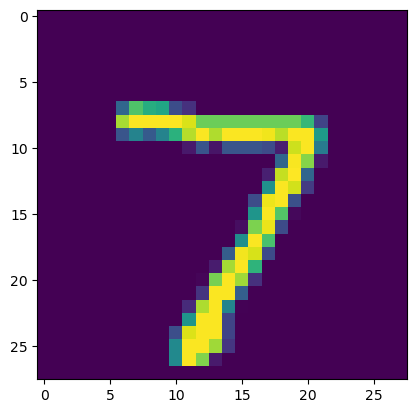

In [12]:
plt.imshow(X_test[0])


y_pred = model.predict(X_test_flat)

In [13]:
np.argmax(y_pred[0])

7

In [14]:
y_pred_labels = [ np.argmax(i) for i in y_pred]
y_pred_labels[:5]

[7, 2, 1, 0, 4]

In [15]:
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_pred_labels )
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 958,    0,    1,    2,    0,    6,    8,    3,    2,    0],
       [   0, 1111,    3,    2,    0,    1,    4,    2,   12,    0],
       [   5,    9,  936,   12,    7,    3,   13,   12,   32,    3],
       [   2,    0,   23,  918,    0,   21,    3,   11,   24,    8],
       [   1,    1,    4,    1,  913,    0,   12,    4,   11,   35],
       [   8,    2,    4,   38,   11,  766,   18,    7,   31,    7],
       [  10,    3,    6,    1,    7,   11,  916,    2,    2,    0],
       [   1,    5,   22,    5,    6,    0,    0,  957,    3,   29],
       [   5,    7,    9,   23,    9,   20,   10,   13,  870,    8],
       [  11,    7,    1,   10,   28,    7,    0,   26,    5,  914]],
      dtype=int32)>

Text(50.722222222222214, 0.5, 'True')

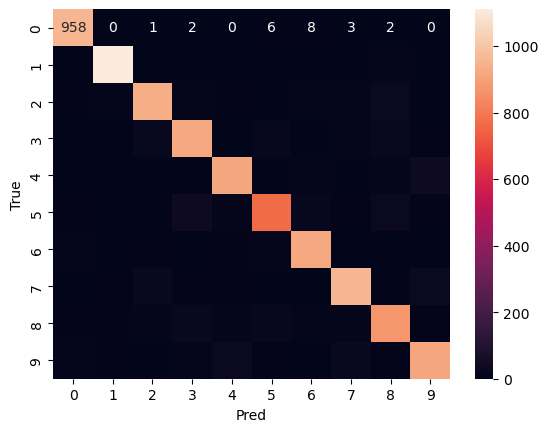

In [16]:
import seaborn as sn 
# plt.figure(figsize = (10,8))
sn.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Pred')
plt.ylabel('True')

In [17]:
model = keras.Sequential(
[
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(100, activation = 'relu'),
    keras.layers.Dense(10, activation = 'sigmoid')
])

tb_callback = tf.keras.callbacks.TensorBoard(log_dir='logs/', histogram_freq=1)

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)


In [18]:
model.fit(X_train, y_train, epochs = 10, callbacks=[tb_callback])

Epoch 1/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.2800 - accuracy: 0.9202
Epoch 2/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.1287 - accuracy: 0.9625
Epoch 3/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0883 - accuracy: 0.9728
Epoch 4/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0682 - accuracy: 0.9787
Epoch 5/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0537 - accuracy: 0.9835
Epoch 6/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0432 - accuracy: 0.9867
Epoch 7/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0355 - accuracy: 0.9887
Epoch 8/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0283 - accuracy: 0.9914
Epoch 9/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0240 - accuracy: 0.9924
Epoch 10/10
1875/1875 [==============================] - 11s 6ms/ste

In [19]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 3s 8ms/step - loss: 0.0821 - accuracy: 0.9780


[0.08207143843173981, 0.9779999852180481]

In [20]:
y_pred = model.predict(X_test)

313/313 [==============================] - 2s 5ms/step


In [21]:
y_pred_labels = [ np.argmax(i) for i in y_pred]
y_pred_labels[:5]

[7, 2, 1, 0, 4]

In [22]:
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_pred_labels )
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 973,    0,    0,    2,    0,    1,    2,    1,    1,    0],
       [   0, 1124,    4,    1,    0,    1,    2,    0,    3,    0],
       [   5,    0, 1000,   12,    2,    0,    0,    4,    8,    1],
       [   0,    0,    2,  998,    0,    3,    0,    2,    2,    3],
       [   2,    0,    3,    2,  954,    0,    5,    4,    1,   11],
       [   2,    0,    0,   13,    1,  872,    2,    1,    1,    0],
       [   4,    2,    3,    1,    3,    5,  937,    0,    3,    0],
       [   1,    2,   12,    4,    1,    0,    0, 1000,    2,    6],
       [   3,    0,    4,    9,    3,   12,    0,    2,  939,    2],
       [   3,    2,    0,    7,    4,    4,    1,    2,    3,  983]],
      dtype=int32)>

Text(50.722222222222214, 0.5, 'True')

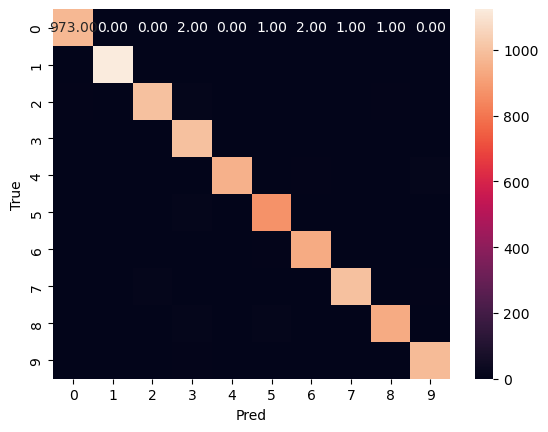

In [23]:
sn.heatmap(cm, annot = True, fmt = '.2f')
plt.xlabel('Pred')
plt.ylabel('True')